# <center>R para Geociencias: Aplicado a la hidrología</center>

### <center>Por: Víctor Rojas</center>

<img src="img/gmail_logo.png" height="30" width="30"> <center>vr.rojaspozo@gmail.com</center>

[<img  src="img/github_logo.png" height="30" width="30">](http://github.com/vrrp)
<center> vrrp </center>

install.packages(c("sp", "raster"))

install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", 
"ggspatial", "libwgeom", "sf", "rnaturalearth", "rnaturalearthdata"))

conda install -c conda-forge r-ncdf4    

conda install -c conda-forge r-rgdal

In [1]:
library("raster")
library("ncdf4")

ncfile = "./data/wrfout_d01_2016-01-31_00:00:00.nc"
data <- nc_open(ncfile)
{
    sink('./data/wrfout_d01_2016-01-31_00:00:00.txt')
 print(data)
    sink()
}


Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 3.6.2”


In [28]:
lons <- ncvar_get(data, "XLONG")
lats_verboseF <- ncvar_get(data, "XLAT", verbose = F)
lats <- ncvar_get(data, "XLAT")
t2m <- ncvar_get(data, "T2")-273

lats_dim = dim(lats)
lons_dim = dim(lons)
t2m_dim = dim(t2m)

lats_dim
lons_dim
t2m_dim

[1]  82 102

[1]  82 102

[1]  82 102

In [37]:
fillvalue <- ncatt_get(data,"T2","_FillValue")
nc_close(data)

fillvalue

$hasatt
[1] FALSE

$value
[1] 0

In [2]:
#t2m

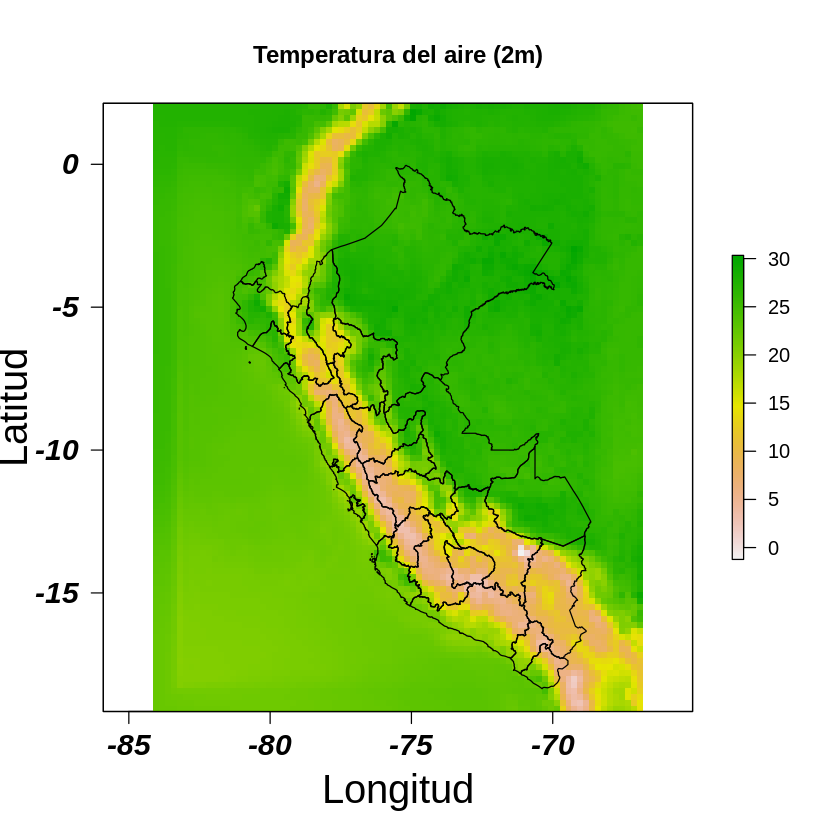

In [30]:
r <- raster(t(t2m), xmn=min(lons), xmx=max(lons), ymn=min(lats), ymx=max(lats), 
            crs=CRS("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs+ towgs84=0,0,0"))

r <- flip(r, direction='y')

p<-plot(r, frame = TRUE, pch = 20, las=1, , xlab = "Longitud", ylab = "Latitud", 
        main="Temperatura del aire (2m)",font.axis=4, cex.axis=1.5, cex.lab=2)

p <- shapefile("./data/shp/PER_adm_shp/PER_adm1.shp")
lines(p)

In [9]:
min(t2m)
max(t2m)

[1] -1.230255

[1] 30.33594

In [10]:
dim_t2m = dim(t2m)
nrows = dim_t2m[1]
ncols = dim_t2m[2]

print(nrows)
print(ncols)

[1] 82
[1] 102


In [32]:
for (irow in 1:nrows){
    for (icol in 1:ncols){
        if(t2m[irow,icol]>10){
            t2m[irow, icol] = NA
        }
    }
}


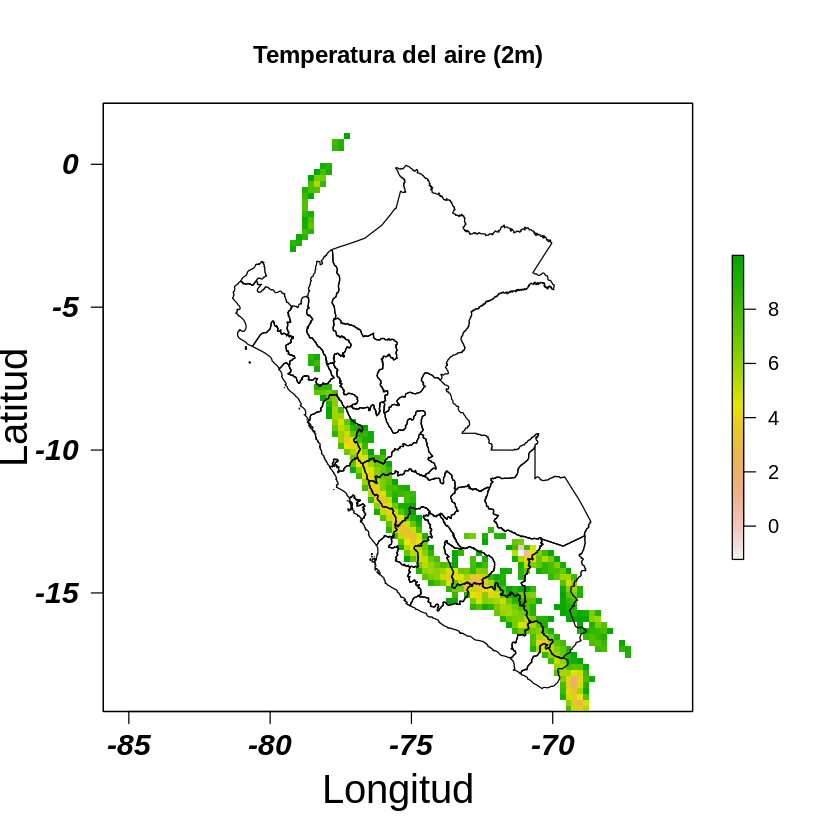

In [33]:
r <- raster(t(t2m), xmn=min(lons), xmx=max(lons), ymn=min(lats), ymx=max(lats), 
            crs=CRS("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs+ towgs84=0,0,0"))
r <- flip(r, direction='y')

p<-plot(r, frame = TRUE, pch = 20, las=1, , xlab = "Longitud", ylab = "Latitud", 
        main="Temperatura del aire (2m)", font.axis=4, cex.axis=1.5, cex.lab=2)

p <- shapefile("./data/shp/PER_adm_shp/PER_adm1.shp")
lines(p)